In [133]:
import pandas as pd

In [134]:
df = pd.read_excel('WEOOct2020all.xls', engine='xlrd')

In [135]:
%store -r gdp_df

In [136]:
columns_to_keep = ['Country', 2023]

In [137]:
gdp_df = gdp_df[columns_to_keep].copy()
gdp_df = gdp_df.rename(columns={2023:'gdp'})
gdp_df = gdp_df.drop_duplicates(subset=['Country'])

In [138]:
export_volume_df = df[(df['Subject Descriptor'].str.match('Volume of exports of goods', case=False, na=False))]

In [139]:
export_volume_df = export_volume_df[columns_to_keep].copy()
export_volume_df = export_volume_df.rename(columns={2023:'voe'})
export_volume_df = export_volume_df.drop_duplicates(subset=['Country'])

In [140]:
merged_df = gdp_df.merge(export_volume_df, on='Country')
merged_df = merged_df.dropna()
merged_df['gdp'] = pd.to_numeric(merged_df['gdp'])
merged_df['voe'] = pd.to_numeric(merged_df['voe'])

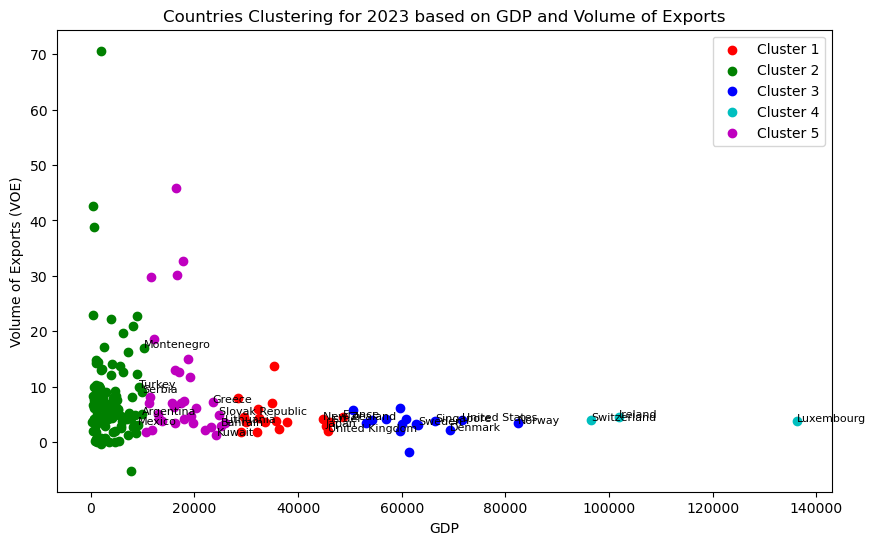

In [141]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = merged_df[['gdp', 'voe']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

merged_df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']

for cluster_num in range(num_clusters):
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['gdp'], cluster_data['voe'], color=colors[cluster_num], label=f'Cluster {cluster_num+1}')

for cluster_num in range(num_clusters):
    top_countries = merged_df[merged_df['cluster'] == cluster_num].nlargest(5, 'gdp')
    for _, row in top_countries.iterrows():
        plt.text(row['gdp'], row['voe'], row['Country'], fontsize=8)

# Set plot labels and title
plt.xlabel('GDP')
plt.ylabel('Volume of Exports (VOE)')
plt.title('Countries Clustering for 2023 based on GDP and Volume of Exports')

plt.legend()
plt.show()